# Assignment1

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from __future__ import print_function
from scipy import stats
import os

In [2]:
#this makes my plots pretty! but it is totally not mandatory to do it
#you can kill this cell if it cause error
import json
os.system("curl -O https://raw.githubusercontent.com/fedhere/UInotebooks/master/fbb_matplotlibrc.json")
os.system("mv " + "fbb_matplotlibrc.json " + os.getenv("PUIDATA"))
s = json.load( open(os.getenv ('PUIDATA')+"/fbb_matplotlibrc.json") )
plt.rcParams.update(s)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
np.random.seed(999)

### Build a Poisson distribution

In [4]:
# set the expectation of interval
lam = 100
poiDis = np.random.poisson(lam, size=5000)

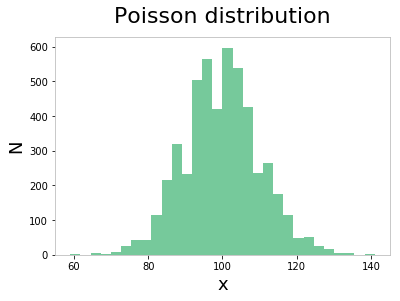

In [5]:
# plot the figure
plt.figure()
plt.hist(poiDis, bins = 30, color='mediumseagreen', alpha=0.7)
plt.ylabel('N', fontsize = 18)
plt.xlabel('x', fontsize = 18)
plt.title('Poisson distribution', fontsize=22, y=1.04)
plt.grid(False)
plt.show()

#### Figure.1 Random-generated poisson distribution: Lambda = 100, N=2000. Hence the μ = 100, σ = 10

### Generate 500 samples of size 100 from Poisson distribution

Calculate the mean of each sample and calculating the Z-statistic

$$
Z = \frac{\bar{x}-\mu}{\sigma / \sqrt{n}}
$$

In [6]:
#generate 500 samples
ranSamples = []
ranSamplesMean = np.zeros(500)
ranSamplesZ = np.zeros(500)
for i in range(500):
    ranSample = np.random.choice(poiDis, 100)
    ranSamples.append(ranSample) 
    ranSamplesMean[i] = ranSample.mean()
    Z = (ranSample.mean() - poiDis.mean()) / (poiDis.std() / 10.)     #Z-test
    ranSamplesZ[i] = Z

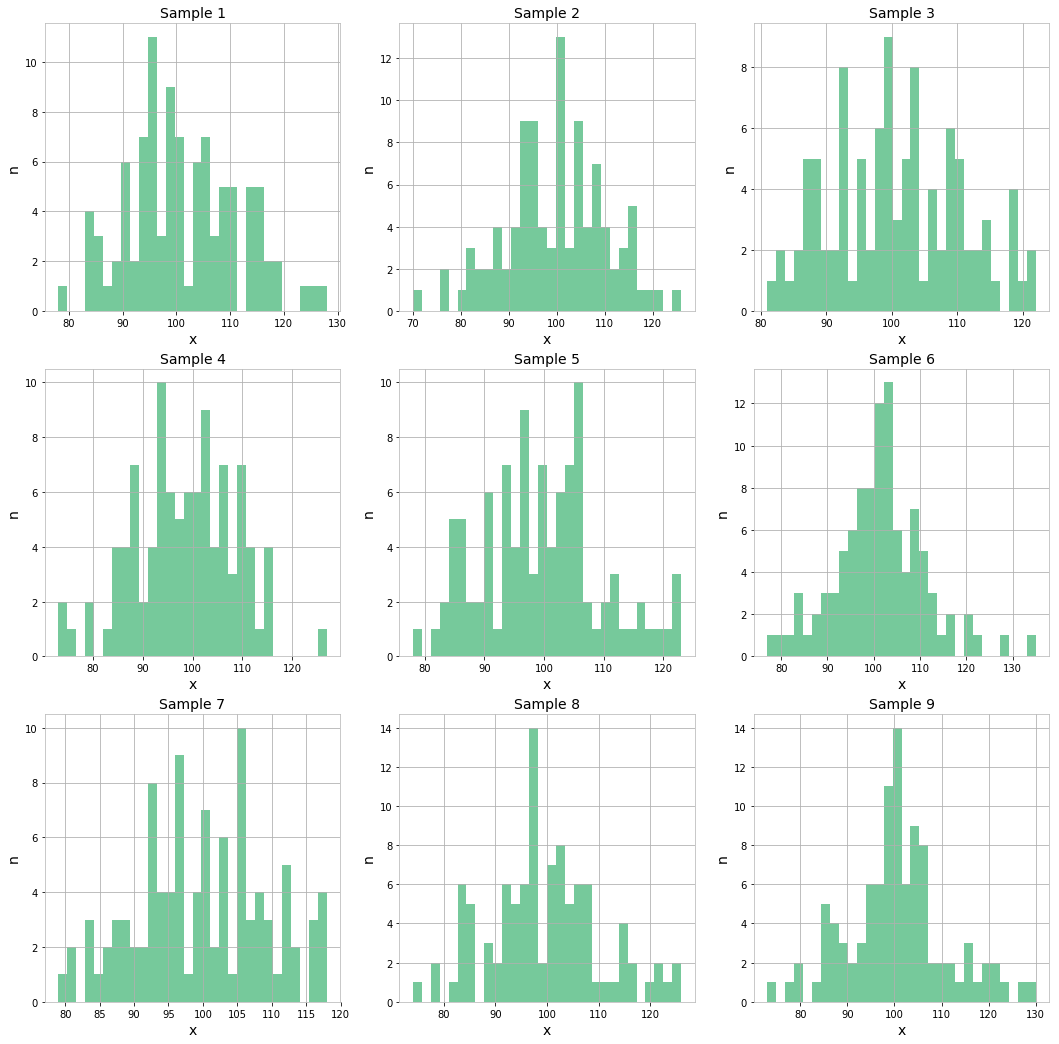

In [7]:
#plot 9 of my samples
plt.figure(figsize = (18,18))
for i in range(1,10):
    plt.subplot(330+i)
    plt.hist(ranSamples[i-1], bins = 30, color='mediumseagreen', alpha=0.7)
    plt.ylabel('n', fontsize = 14)
    plt.xlabel('x', fontsize = 14)
    plt.title('Sample %d'%(i), fontsize = 14)

#### Figure. 2 Nine samples from Poisson distribution. Sample size: 100

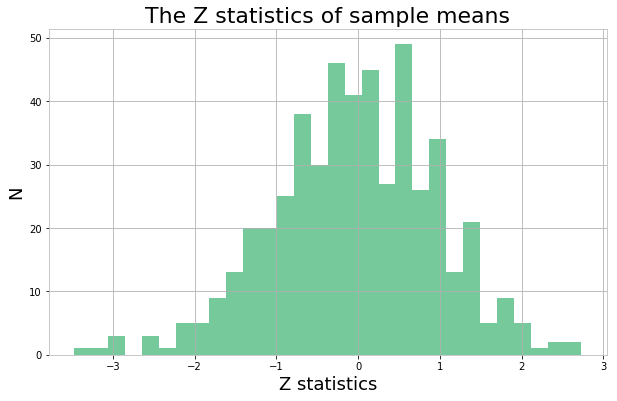

In [8]:
#plot the distribution of z statistics
plt.figure(figsize=(10,6))
plt.hist(ranSamplesZ, bins = 30, color='mediumseagreen', alpha=0.7)
plt.ylabel('N', fontsize = 18)
plt.xlabel('Z statistics', fontsize = 18)
plt.title('The Z statistics of sample means', fontsize = 22)

#### Figure 3. The Z statistics of sample means with the Poisson distribution mean. It looks consistent with N(0, 1)

### KS TEST
#### alpha = 0.05
#### Null hypothesis: The distribution of  Z statistics of sample means and the Gaussian distribution are identical.

In [9]:
print ("Z statistics on normal", stats.kstest(ranSamplesZ, 'norm'))

Z statistics on normal KstestResult(statistic=0.029773283265487782, pvalue=0.76722666130856909)


#### As in this KS test: pvalue = 0.767 > 0.05, we can not reject the Null hypothsis, The distribution of  Z statistics of sample means follows the Gaussian distribution.

### find the best fit values for the model parameters (mean and standard deviation) by minimizing the model chi square.